<a href="https://colab.research.google.com/github/sriramreddy-7/DAFE_ML/blob/main/DAFE_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DAFE/newdata_999.csv')
dataset = dataset.drop('instagram_name', axis=1)
print(dataset)
X = dataset.drop('revenue', axis=1)
y = dataset['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     Subscribers_count  Likes_avg  Comments_avg.  Country   Eng_avg  \
0             50700000     274900         456700        1  0.014430   
1              3600000     449400         592700        2  0.289472   
2             13400000     269600         304100        2  0.042813   
3             18600000     164400         189400        3  0.019022   
4              3500000     525100         643000        4  0.333743   
..                 ...        ...            ...      ...       ...   
988           33000000     412400         560800        7  0.029491   
989           33000000     412400         560800        7  0.029491   
990           14100000    1400000        1700000        7  0.219858   
991           14000000     145800         262000        2  0.029129   
992            8500000     342400         519299       24  0.101376   

         revenue    cpm  
0     8910888.00  12.18  
1     1563150.00   1.50  
2      860550.00   1.50  
3       88450.00   0.25  
4     7826270.00 

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [ ]:
svm = r2_score(y_test, y_pred)
print('svm=',svm)

svm= 0.5963544078578431


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k = 5  # Adjust the number of neighbors (k) as needed
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
knn = r2_score(y_test, y_pred)
print('knn=',knn)

knn= 0.5963544078578431


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
lr = r2_score(y_test, y_pred)
print('Linear regression :',lr)

Linear regression : 0.7263891658514543


In [ ]:
n_estimators = 3
random_forest = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rf = r2_score(y_test, y_pred)
print('random forest : ',rf)


random forest :  0.8541571686607772


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred = poly_regression.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
poly = r2_score(y_test, y_pred)
print("polynomial regression : ",poly)

polynomial regression :  1.0


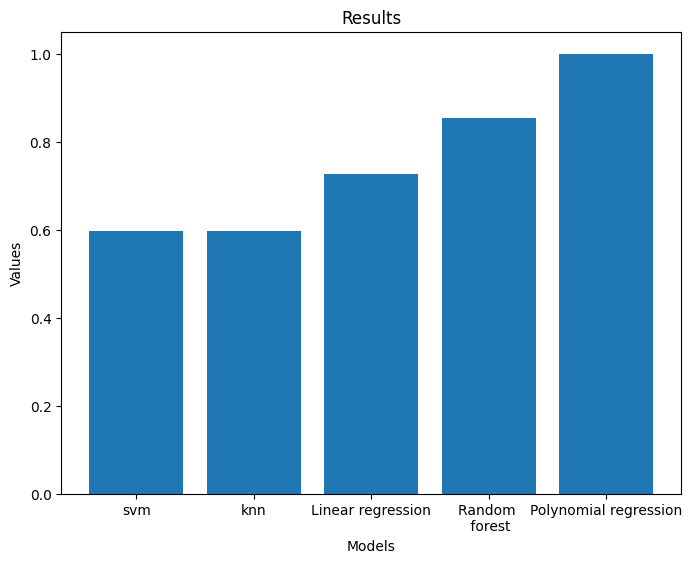

In [ ]:
import matplotlib.pyplot as plt
y = [svm,knn,lr,rf,poly]
x = ["svm","knn","Linear regression","Random \n forest","Polynomial regression"]
plt.figure(figsize=(8, 6))
plt.bar(x,y)
plt.xlabel("Models")
plt.ylabel("Values")
plt.title("Results")
plt.show()